# Polynomial regression

In [2]:
import pandas as pd

In [7]:
# Creating a dataframe of the csv file
df = pd.read_csv("../Ice_cream selling data.csv")
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


Text(0, 0.5, 'Sales units')

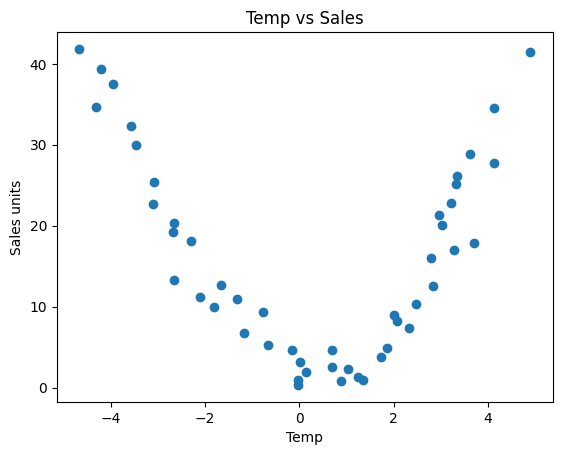

In [132]:
# Plotting all of the points as a scatter, can see that this data fits a polynomial line
import matplotlib.pyplot as plt

X = df.iloc[:,0].values
y = df.iloc[:,-1].values

plt.scatter(X, y)
plt.title("Temp vs Sales")
plt.xlabel("Temp")
plt.ylabel("Sales units")

In [133]:
from sklearn.model_selection import train_test_split
import numpy as np

# Splitting the data into testing and training

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 ,random_state=42)

In [134]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# A degree of 3 gives me the least amount of error
poly = PolynomialFeatures(degree=3)

# Converting the data to be polynomial. Reshaping the array to a 2d array here as well
X_train_poly = poly.fit_transform(X_train.reshape(-1,1))
X_test_poly = poly.fit_transform(X_test.reshape(-1,1))

# Creating and training the model on the polynomial datapoints
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [135]:
# Creating the predictions
y_pred = model.predict(X_test_poly)
y_pred

array([11.26173782, 26.15229744, 32.94239669, 24.79940325,  5.0189787 ,
        3.43248573,  3.08780469,  2.79001857,  7.01713112,  3.09175474])

In [136]:
from sklearn import metrics as m
r_squared = m.r2_score(y_test, y_pred)
mae = m.mean_absolute_error(y_test, y_pred)
mse = m.mean_squared_error(y_test, y_pred)

# Determines how good the model performs on a number from 0 to 1
print("R-squared: ", r_squared)

# The mean of all the errors in the prediction
print("Mean absolute error: ", mae)

# The mean of all the errors squared, making the bigger errors more significant
print("Mean squared errer: ", mse)

R-squared:  0.8405107685716915
Mean absolute error:  3.228121129776889
Mean squared errer:  15.120009451229484


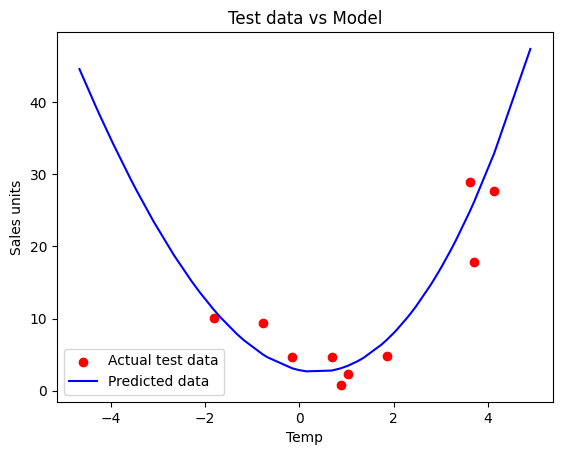

In [137]:
#Visualizing the test vs predictions

#This plots the actual test data in a scatter plot
plt.scatter(X_test, y_test, color='r', label="Actual test data")

# This line is the polynomial regression line on the entire dataset
plt.plot(X, model.predict(poly.fit_transform(X.reshape(-1,1))), color='b', label="Predicted data")

plt.title("Test data vs Model")
plt.xlabel("Temp")
plt.ylabel("Sales units")
plt.legend()

### Degrees
Testing different degrees, 3 gives me the smallest amount of error.


---



### Overfitting vs Underfitting
When deciding on the degree we have to be careful because if we give the model too many degrees the line will convert to the test data and create sort of a jagged line that goes from each point in the test data which will be overfitting.

On the contrary if we use to few degrees the line will not follow the curve of the data and we will have underfitting